<a href="https://colab.research.google.com/github/Nov05/playground-fireball/blob/master/notebooks/2019_10_19_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-10-19

project repository   
https://github.com/Nov05/playground-fireball  

data source   
https://catalog.data.gov/dataset/fireball-and-bolide-reports    
https://cneos.jpl.nasa.gov/fireballs/   

Latitude and longitude formats   
http://www.geomidpoint.com/latlon.html   

In [0]:
!pip install colorlover
# Successfully installed colorlover-0.3.0
!pip install category_encoders
!pip install eli5 pdpbox shap

# Imports

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, \
     init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

import colorlover as cl
from IPython.display import HTML

from itertools import chain
from random import randint
import shap

import sklearn
from sklearn import datasets

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, \
     ExtraTreesClassifier, ExtraTreesRegressor, \
     GradientBoostingClassifier, GradientBoostingRegressor, \
     RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, \
     GridSearchCV, cross_val_score, validation_curve, \
     RandomizedSearchCV
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error, \
     mean_squared_error, mean_squared_log_error, \
     accuracy_score, log_loss, r2_score, \
     classification_report, confusion_matrix, \
     roc_auc_score
from sklearn.utils.multiclass import unique_labels

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, \
     OneHotEncoder, OrdinalEncoder, LabelEncoder

import category_encoders as ce
from category_encoders.binary import BinaryEncoder 

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

import eli5
from eli5.sklearn import PermutationImportance

from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Using TensorFlow backend.


In [0]:
!python --version
print("category_encoders", ce.__version__)  
print("pandas", pd.__version__)  
print("sklearn", sklearn.__version__)  
print("SHAP", shap.__version__)

Python 3.6.8
category_encoders 2.1.0
pandas 0.24.2
sklearn 0.21.3
SHAP 0.30.2


# Data Wrangling

In [2]:
url1 = "https://raw.githubusercontent.com/Nov05/playground-fireball/master/data/Fireball_And_Bolide_Reports.csv"
url2 = "https://raw.githubusercontent.com/Nov05/playground-fireball/master/data/cneos_fireball_data.csv"
df = pd.read_csv(url2)
print(df.shape)
df.head()

(802, 10)


,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2019-10-10 16:16:36,44.3N,122.9E,47.3,14.1,1.5,-12.9,-5.4,2.060000e+11,0.570
1,2019-09-28 10:40:20,12.5S,107.2W,52.0,20.4,-10.1,11.2,13.7,2.300000e+10,0.082
2,2019-09-27 13:35:46,25.7N,28.4W,NaN,NaN,NaN,NaN,NaN,3.400000e+10,0.120
3,2019-09-14 12:39:34,38.6S,33.5W,38.0,15.9,-12.9,8.1,4.6,1.090000e+11,0.330
4,2019-09-13 02:02:04,18.6S,126.9E,27.4,13.5,5.2,-8.1,9.5,4.200000e+10,0.140


In [3]:
df.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,373.000000,208.000000,208.000000,208.000000,208.000000,8.020000e+02,802.00000
mean,36.229491,17.691346,0.409135,-2.059135,-0.550481,9.757955e+11,1.51737
std,10.362336,5.969886,10.772678,11.114925,10.361430,1.407188e+13,16.84953
min,15.200000,9.800000,-35.400000,-43.500000,-31.200000,2.000000e+10,0.07300
25%,29.600000,13.775000,-7.625000,-10.525000,-8.425000,3.300000e+10,0.11000
50%,34.300000,16.500000,0.600000,-2.750000,0.850000,6.700000e+10,0.21000
75%,40.700000,19.200000,8.550000,5.150000,7.250000,1.530000e+11,0.44000
max,74.000000,49.000000,27.800000,31.200000,27.000000,3.750000e+14,440.00000


In [4]:
df.isnull().sum()

Peak Brightness Date/Time (UT)           0
Latitude (deg.)                        183
Longitude (deg.)                       183
Altitude (km)                          429
Velocity (km/s)                        594
vx                                     594
vy                                     594
vz                                     594
Total Radiated Energy (J)                0
Calculated Total Impact Energy (kt)      0
dtype: int64

In [5]:
# convert datetime
df['peak_brightness'] = pd.to_datetime(df.iloc[:,0], infer_datetime_format=True)
df['year'] = df['peak_brightness'].dt.year
df['month'] = df['peak_brightness'].dt.month
df['hour'] = df['peak_brightness'].dt.hour
cols = ['Peak Brightness Date/Time (UT)',
        'peak_brightness',
        'year', 'month', 'hour']
df[cols].sample(5)

,Peak Brightness Date/Time (UT),peak_brightness,year,month,hour
269,2011-12-19 11:35:39,2011-12-19 11:35:39,2011,12,11
475,2005-08-09 14:35:45,2005-08-09 14:35:45,2005,8,14
455,2006-01-28 03:33:48,2006-01-28 03:33:48,2006,1,3
89,2017-05-24 07:03:03,2017-05-24 07:03:03,2017,5,7
448,2006-04-25 18:46:53,2006-04-25 18:46:53,2006,4,18


In [6]:
# latitude and longitude 
# Degrees only formats (DDD + compass direction)
"""
41 N and 120 W
41°N and 120°W
N41.092 and W120.8362
90S and 0E (South Pole)
"""
df['latitude'] = df.iloc[:,1].apply(lambda x: 0 if x is np.nan else (float(x[:-1]) if x[-1]=='N' else float(x[:-1])*(-1)))
df['longitude'] = df.iloc[:,2].apply(lambda x: 0 if x is np.nan else (float(x[:-1]) if x[-1]=='E' else float(x[:-1])*(-1)))
df[['latitude', 'longitude']].sample(5)

,latitude,longitude
392,28.0,-41.5
182,-68.2,-24.0
634,-13.6,-5.8
56,32.0,-60.7
128,36.5,-37.2


In [9]:
df['energy_log'] = np.log1p(df['Calculated Total Impact Energy (kt)'])
df[['energy_log', 'Calculated Total Impact Energy (kt)']].sample(5)

,energy_log,Calculated Total Impact Energy (kt)
678,0.113329,0.12
586,1.098612,2.00
446,0.095310,0.10
451,0.350657,0.42
15,0.131028,0.14


# Profile Report

In [0]:
pandas_profiling.ProfileReport(df.iloc[:,3:])

Number of variables,13
Number of observations,802
Total Missing (%),26.9%
Total size in memory,81.5 KiB
Average record size in memory,104.1 B
Numeric,11
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,1


# Velocity

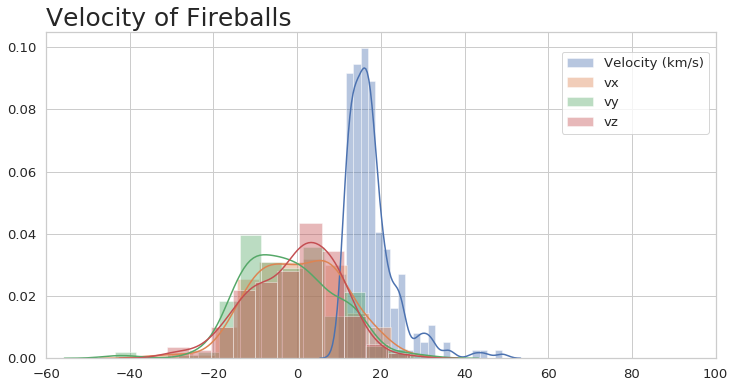

In [10]:
cols = ['Velocity (km/s)',
        'vx',
        'vy',
        'vz']
sns.set(font_scale=1.2)  
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
for i in cols:
    ax = sns.distplot(df[i].dropna())
    ax.set(xlabel='')
plt.xlim(-60,100)
fig.legend(labels=cols,
           bbox_to_anchor=(0.9,0.85), 
           loc="upper right",  
           bbox_transform=fig.transFigure)
plt.title('Velocity of Fireballs', 
          fontsize=25, loc='left');

# Time

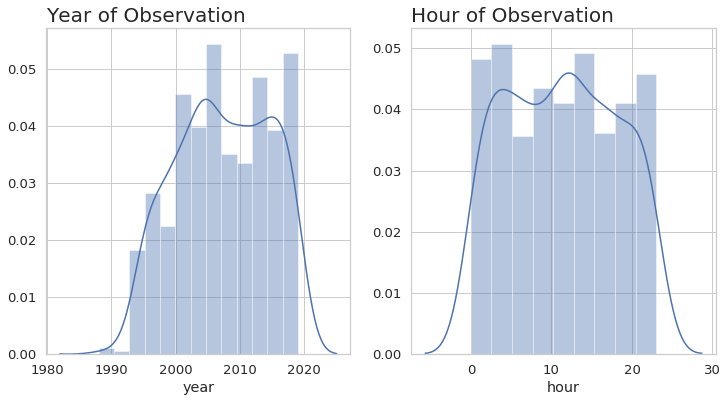

In [11]:
sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.distplot(df['year'], ax=axes[0])
sns.distplot(df['hour'], ax=axes[1])
axes[0].set_title('Year of Observation',
                  fontsize=20, loc='left')
axes[1].set_title('Hour of Observation',
                  fontsize=20, loc='left');

# Energy

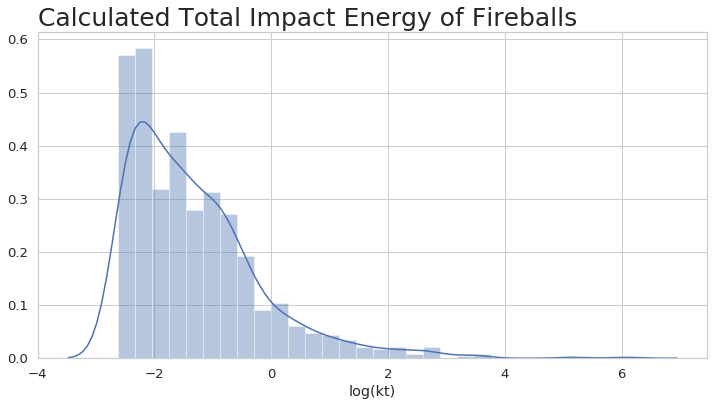

In [12]:
sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.distplot(np.log(df['Calculated Total Impact Energy (kt)']))
plt.xlabel('log(kt)')
plt.title('Calculated Total Impact Energy of Fireballs',
          fontsize=25, loc='left');

# Velocity vs. Energy

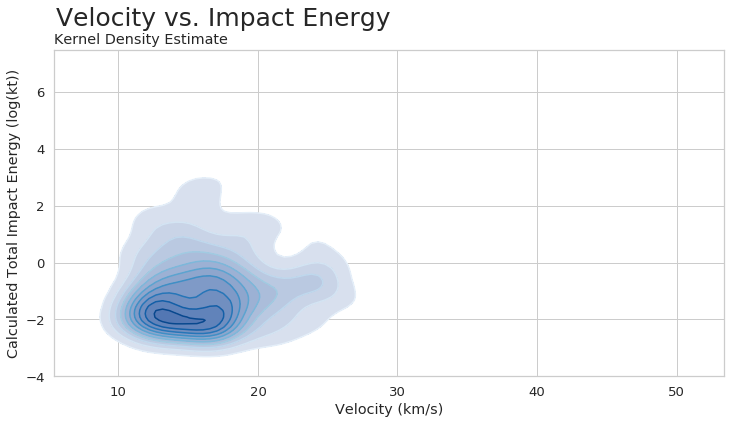

In [13]:
cols = ['Velocity (km/s)', 'Calculated Total Impact Energy (kt)']
df_tmp = df[cols].dropna()

sns.set(font_scale=1.2) 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.kdeplot(df_tmp[cols[0]],
            np.log(df_tmp[cols[1]]),
            shade_lowest=False,
            shade=True)
sns.kdeplot(df_tmp[cols[0]],
            np.log(df_tmp[cols[1]]),
            cmap="Blues")
plt.ylabel('Calculated Total Impact Energy (log(kt))')
plt.suptitle('Velocity vs. Impact Energy',
             fontsize=25, x=0.32)
plt.title('Kernel Density Estimate',
          loc='left');

# Custom colorscale

In [14]:
blues = cl.scales['9']['seq']['Blues']
print(blues)
HTML(cl.to_html(blues))

['rgb(247,251,255)', 'rgb(222,235,247)', 'rgb(198,219,239)', 'rgb(158,202,225)', 'rgb(107,174,214)', 'rgb(66,146,198)', 'rgb(33,113,181)', 'rgb(8,81,156)', 'rgb(8,48,107)']


In [0]:
blues500 = cl.interp(blues, 500) # Map color scale to 500 bins
HTML(cl.to_html(blues500))

In [0]:
deepblues = []
for i in range(9):
    deepblues.append(blues500[-1-int(250/9*i)])
deepblues = deepblues[::-1]
HTML(cl.to_html(deepblues))

# Plotly 2D World Map

https://plot.ly/python/scatter-plots-on-maps/    
https://plot.ly/python/reference/     

In [30]:
df1 = df[(df['latitude']!=0) & (df['longitude']!=0)]
df1['impact'] = np.log1p(np.log1p(df1['Calculated Total Impact Energy (kt)']))
# scaler = MinMaxScaler()
# df1['impact_norm'] = scaler.fit_transform(df1['impact'].values.reshape(-1,1))
df1['impact_norm'] = df1['impact'] * 50
df1['text'] = (df1['peak_brightness'].astype(str)
               + '<br>Energy (kt) '
               + df1['Calculated Total Impact Energy (kt)'].astype(str)
               + '<br>Velocity (km/s) '
               + df1['Velocity (km/s)'].astype(str))
df2 = df1[df1['Velocity (km/s)'].isnull()==False]
df3 = df1[df1['Velocity (km/s)'].isnull()==True]

colorscales = ["Greens", "YlOrRd", "Bluered", "RdBu", "Reds", 
               "Blues", "Picnic", "Rainbow", "Portland", "Jet", 
               "Hot", "Blackbody", "Earth", "Electric", "Viridis", 
               "Cividis"]
color_rdbu = [
    [0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'],
    [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'],
    [1, 'rgb(217,30,30)']
]
# create custom colorscale "deepblues"
blues = cl.scales['9']['seq']['Blues']
blues500 = cl.interp(blues, 500) # Map color scale to 500 bins
deepblues = []
for i in range(9):
    deepblues.append(blues500[-1-int(250/9*i)])
deepblues = deepblues[::-1]

colorscale = deepblues #'Blues'
# colorscale_rgb = [i[1] for i in colorscale]
landcolor = "rgb(250, 250, 250)" #"rgb(212, 212, 212)"

trace1 = go.Scattergeo(
    lon = df2['longitude'],
    lat = df2['latitude'],
    text = df2['text'],
    mode = 'markers',
    marker = dict(
        size = df2['impact_norm'],
        opacity = 0.7,
        autocolorscale = False,
        line = dict(width=0.1),
        color = df2['Velocity (km/s)'],
        colorscale = colorscale,
        cmin = 0,
        cmax = df2['Velocity (km/s)'].max(),
        colorbar_title = 'Velocity<br>(km/s)',
        colorbar = dict(
            x=1.01,
            len=0.5, 
            thickness=10,
            outlinewidth=0),
        ),
    name='Velocity<br>Known',
    )
trace2 = go.Scattergeo(
    lon = df3['longitude'],
    lat = df3['latitude'],
    text = df3['text'],
    mode = 'markers',
    marker = dict(
        size = df3['impact_norm'],
        opacity = 0.2,
        autocolorscale = False,
        line = dict(width=0.1),
        color = 'gray',
        ),
    name='Velocity<br>Unknown',
    )
data = [trace1, trace2]

layout = go.Layout(
    title=dict(
        text='Fireballs Reported by US Government Sensors',
        x=0.01, y=0.88),
    width=1300,
    height=800,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30),
    geo = dict(
        landcolor=landcolor,),
    legend=dict(x=1.01, y=0.85),
    hoverlabel=dict(font=dict(color='white')),
    )
fig = go.Figure(data=data, layout=layout)
fig.show()

In [31]:
plot(fig, filename='2019-10-20 2d world.html', auto_open=False)

'2019-10-20 2d world.html'

# Plotly 3D Scatter

In [0]:
df.columns

Index(['Peak Brightness Date/Time (UT)', 'Latitude (deg.)', 'Longitude (deg.)',
       'Altitude (km)', 'Velocity (km/s)', 'vx', 'vy', 'vz',
       'Total Radiated Energy (J)', 'Calculated Total Impact Energy (kt)',
       'peak_brightness', 'year', 'month', 'hour', 'latitude', 'longitude'],
      dtype='object')

In [0]:
cols = ['latitude', 'longitude', 'Altitude (km)']
print(df[cols].isnull().sum())
df[cols].describe().loc[['count', 'min', 'max']]

latitude           0
longitude          0
Altitude (km)    429
dtype: int64


,latitude,longitude,Altitude (km)
count,802.0,802.0,373.0
min,-83.7,-179.7,15.2
max,88.5,180.0,74.0


In [0]:
condition = (
    (df['latitude']!=0) &
    (df['longitude']!=0) &
    (df['Altitude (km)']!=0) &
    (df['Altitude (km)'].isnull()==False)
)
df4 = df[condition]
print(df4.shape)
df4[cols].sample(2)

(372, 16)


,latitude,longitude,Altitude (km)
7,21.9,-130.4,39.8
343,-4.2,120.6,19.1


https://plot.ly/python/3d-axes/#background-and-grid-color   

In [32]:
cols = ['latitude', 'longitude', 'Altitude (km)']
condition = (
    (df['latitude']!=0) &
    (df['longitude']!=0) &
    (df['Altitude (km)']!=0) &
    (df['Altitude (km)'].isnull()==False)
)
df4 = df[condition]
df4['text'] = (df4['peak_brightness'].astype(str)
               + '<br>Energy (kt) '
               + df4['Calculated Total Impact Energy (kt)'].astype(str)
               + '<br>Velocity (km/s) '
               + df4['Velocity (km/s)'].astype(str))
x = df4['latitude']
y = df4['longitude']
z = df4['Altitude (km)']
# marker size
s = np.log1p(np.log1p(df4['Calculated Total Impact Energy (kt)'])) * 20
t = df4['text']

redblues = [
    [0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'],
    [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'],
    [1, 'rgb(217,30,30)']
]
redblues_rgb = [i[1] for i in redblues]
colorscale = redblues

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=s,
        color=z, # set color to an array/list of desired values
        colorscale=colorscale, 
        opacity=1,
        showscale=True,
        colorbar=dict(x=0.78, 
                      len=0.5, 
                      thickness=10,
                      outlinecolor='white', 
                      outlinewidth=0,
                      title=dict(text="Altitude<br>(km)", font=dict(size=10))
                     ),
        line=dict(width=0.001, color='black')
    ),
    hovertext=t,
    hoverlabel=dict(bgcolor='whitesmoke'),
    projection=dict(x=dict(show=True, opacity=0.1, scale=0.4),
                    y=dict(show=True, opacity=0.1, scale=0.4),
                    z=dict(show=True, opacity=0.1, scale=0.4),
                   )
)

data = [trace1]
layout = go.Layout(
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    title=dict(
        text='Fireballs Reported by US Government Sensors',
        x=0.4, y=0.9),
    scene=dict(xaxis=dict(title="x = "+cols[0],
                          backgroundcolor="white",
                          gridcolor="lightgray",
                         ),
               yaxis=dict(title="y = "+cols[1],
                          backgroundcolor="white",
                          gridcolor="lightgray",
                         ),
               zaxis=dict(title="z = "+cols[2],
                          backgroundcolor="aliceblue",
                          gridcolor="lightgray",
                         ),
              ),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [33]:
plot(fig, filename='2019-10-20 3d scatter.html', auto_open=False)

'2019-10-20 3d scatter.html'

# Save processed data to CSV

In [0]:
df.to_csv('01_processed.csv', index=False)

# Use regression model to estimate missing Velocity data

In [0]:
df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),peak_brightness,year,month,hour,latitude,longitude,energy_log
0,2019-10-10 16:16:36,44.3N,122.9E,47.3,14.1,1.5,-12.9,-5.4,2.060000e+11,0.570,2019-10-10 16:16:36,2019,10,16,44.3,122.9,0.451076
1,2019-09-28 10:40:20,12.5S,107.2W,52.0,20.4,-10.1,11.2,13.7,2.300000e+10,0.082,2019-09-28 10:40:20,2019,9,10,-12.5,-107.2,0.078811
2,2019-09-27 13:35:46,25.7N,28.4W,NaN,NaN,NaN,NaN,NaN,3.400000e+10,0.120,2019-09-27 13:35:46,2019,9,13,25.7,-28.4,0.113329
3,2019-09-14 12:39:34,38.6S,33.5W,38.0,15.9,-12.9,8.1,4.6,1.090000e+11,0.330,2019-09-14 12:39:34,2019,9,12,-38.6,-33.5,0.285179
4,2019-09-13 02:02:04,18.6S,126.9E,27.4,13.5,5.2,-8.1,9.5,4.200000e+10,0.140,2019-09-13 02:02:04,2019,9,2,-18.6,126.9,0.131028


In [0]:
# half of the Velocity data are missing
df.isnull().sum()

Peak Brightness Date/Time (UT)           0
Latitude (deg.)                        183
Longitude (deg.)                       183
Altitude (km)                          429
Velocity (km/s)                        594
vx                                     594
vy                                     594
vz                                     594
Total Radiated Energy (J)                0
Calculated Total Impact Energy (kt)      0
peak_brightness                          0
year                                     0
month                                    0
hour                                     0
latitude                                 0
longitude                                0
energy_log                               0
dtype: int64

In [0]:
# all observations have Impact Energy data
df[df['Calculated Total Impact Energy (kt)']==0].shape

(0, 17)

In [36]:
# prepare train, validation, test datesets
features = ['year', 'month', 'hour', 'latitude', 'longitude',
            'energy_log']
target = 'Velocity (km/s)'

trainval = df[df['Velocity (km/s)'].isnull()==False]
test = df[df['Velocity (km/s)'].isnull()==True]

X_trainval = trainval
y_trainval = trainval[target]
X_test = test
y_test = test[target]
print(X_trainval.shape, y_trainval.shape)
print(X_test.shape, y_test.shape)

(208, 17) (208,)
(594, 17) (594,)


### Beseline error score

In [37]:
# baseline score
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.33, random_state=42)
print("train mean velocity:", y_train.mean())
y_val_pred = [y_train.mean()] * len(y_val)
print('baseline error score:', mean_squared_error(y_val, y_val_pred))

train mean velocity: 17.420863309352523
baseline error score: 37.005107366093355


### Random Forest

In [42]:
%%time
numeric_features = features
lowcardi_features = []
highcardi_features = []

###############################################
# Pipeline preprocessor
###############################################
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', ce.OneHotEncoder(drop_invariant=True, use_cat_names=True))]) 
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', ce.OrdinalEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('one', onehot_transformer, lowcardi_features), # categorical_features
        ('ord', ordinal_transformer, highcardi_features), # categorical_features
    ])
###############################################
# Random Forest with Cross Validation
###############################################
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('rf', RandomForestRegressor(n_estimators=10, 
                                                        max_depth=20,
                                                        random_state=5, 
                                                        n_jobs=-1, 
                                                        oob_score=True,)),
                          ])
params = {
    'rf__n_estimators': [10, 15, 20],
    'rf__max_depth': [1, 2, 3, 5],
#     'rf__max_features': ['auto', 'sqrt', 'log2'],
#     'rf__criterion': ['mse', 'mae']
    }
search = GridSearchCV(
    pipeline, 
    params, 
    return_train_score=True,
    cv=5)
search.fit(X_train[features], y_train)

CPU times: user 4.16 s, sys: 1.68 s, total: 5.84 s
Wall time: 1min 32s


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html  

In [0]:
# keys = list(pipeline.get_params().keys())
# row = []
# for i in range(len(keys)):
#     row.append(keys[i])
#     if i % 4 == 1:
#         print(row)
#         row = []
'''
['rf__bootstrap', 'rf__criterion']
['rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__min_impurity_decrease']
['rf__min_impurity_split', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf']
['rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state']
'''

In [43]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation best score', search.best_score_)

Best hyperparameters {'rf__max_depth': 1, 'rf__n_estimators': 15}
Cross-validation best score -0.09695004563178171


In [44]:
y_val_pred = search.predict(X_val[features])
print('Random Forest error score:', mean_squared_error(y_val, y_val_pred))

Random Forest error score: 35.89499373867783


### Feature importance

In [0]:
###############################################
# eli5
###############################################
pipeline.fit(X_train[features], y_train)

permuter = PermutationImportance(pipeline['rf'], 
                                 scoring='neg_mean_squared_error', 
                                 cv='prefit', 
                                 n_iter=2, 
                                 random_state=5)
permuter.fit(pipeline['preprocessor'].transform(X_val[features]), y_val)

# Transformed features
tfs = pipeline['preprocessor'].named_transformers_
features_transformed = numeric_features
eli5.show_weights(permuter, top=None, feature_names=features_transformed)

Weight,Feature
3.5902 ± 0.0389,year
2.6539 ± 3.3665,latitude
2.4050 ± 5.9026,hour
-0.3560 ± 1.9734,month
-0.7276 ± 0.8645,longitude
-1.2938 ± 0.8277,energy_log


### Recover missing velocity data

In [45]:
y_test_pred = search.predict(X_test[features])
df5 = X_trainval.append(X_test, ignore_index=True)
df5['velocity'] = list(y_trainval) + list(y_test_pred)
print(df5.shape)
df5.head(2)

(802, 18)


,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),peak_brightness,year,month,hour,latitude,longitude,energy_log,velocity
0,2019-10-10 16:16:36,44.3N,122.9E,47.3,14.1,1.5,-12.9,-5.4,2.060000e+11,0.570,2019-10-10 16:16:36,2019,10,16,44.3,122.9,0.451076,14.1
1,2019-09-28 10:40:20,12.5S,107.2W,52.0,20.4,-10.1,11.2,13.7,2.300000e+10,0.082,2019-09-28 10:40:20,2019,9,10,-12.5,-107.2,0.078811,20.4


In [47]:
df6 = df5[(df5['latitude']!=0) & (df5['longitude']!=0)]
df6['energy_log2'] = np.log1p(df5['energy_log']) * 50
df6['text'] = (df5['peak_brightness'].astype(str)
               + '<br>Energy (kt) '
               + df5['Calculated Total Impact Energy (kt)'].astype(str)
               + '<br>Velocity (km/s) '
               + df5['velocity'].astype(str))

# create custom colorscale "deepblues"
blues = cl.scales['9']['seq']['Blues']
blues500 = cl.interp(blues, 500) # Map color scale to 500 bins
deepblues = []
for i in range(9):
    deepblues.append(blues500[-1-int(250/9*i)])
deepblues = deepblues[::-1]

colorscale = deepblues #'Blues'
landcolor = "rgb(250, 250, 250)"

trace1 = go.Scattergeo(
    lon = df6['longitude'],
    lat = df6['latitude'],
    text = df6['text'],
    mode = 'markers',
    marker = dict(
        size = df6['energy_log2'],
        opacity = 0.7,
        autocolorscale = False,
        line = dict(width=0.1),
        color = df6['velocity'],
        colorscale = colorscale,
        cmin = 0,
        cmax = df6['velocity'].max(),
        colorbar_title = 'Velocity<br>(km/s)',
        colorbar = dict(
            x=1.01, 
            len=0.5, 
            thickness=10,
            outlinewidth=0),
        ),
    name='Velocity<br>Recovered',
    showlegend=True,
    )
data = [trace1]

layout = go.Layout(
    title=dict(
        text='Fireballs Reported by US Government Sensors',
        x=0.01, y=0.88),
    width=1300,
    height=800,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30),
    geo = dict(
        landcolor=landcolor,),
    legend=dict(x=1.01, y=0.85),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [48]:
# save to html
plot(fig, filename='2019-10-20 all velocity.html', auto_open=False)

'2019-10-20 all velocity.html'